In [ ]:
import pandas as pd
import numpy as np
import os, sys

os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

In [ ]:
# Construct the file path
file_path = os.path.join(rpath, 'data', 'BrentOilPrices.csv')

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)
data.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [ ]:
data = pd.read_csv('/content/drive/My Drive/10Academy/week10/data/data/Copy of BrentOilPrices.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.rename(columns={'Date': 'DATE'}, inplace=True)
data.set_index('DATE', inplace=True)
data

<ipython-input-3-bee4c70d490c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


,Price
DATE,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25


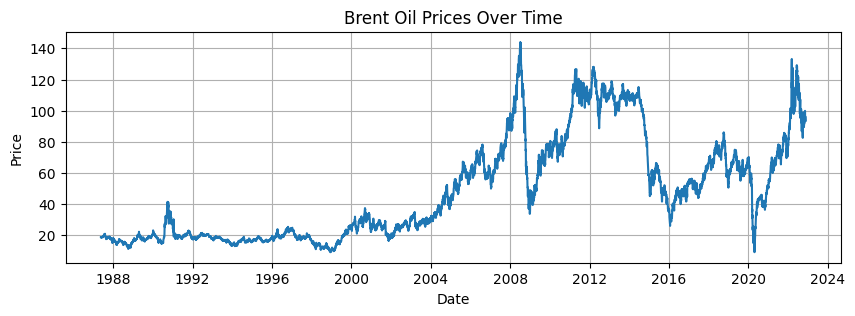

In [ ]:
# prompt: plot the price data
plt.figure(figsize=(10, 3))
plt.plot(data.index, data['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Brent Oil Prices Over Time')
plt.grid(True)
plt.show()

In [ ]:
oil_data = data.copy()
oil_data = oil_data.resample('A').mean()
oil_data.head()

<ipython-input-4-30fee3dbe43d>:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  oil_data = oil_data.resample('A').mean()


,Price
DATE,
1987-12-31,18.525813
1988-12-31,14.905412
1989-12-31,18.228228
1990-12-31,23.761445
1991-12-31,20.041128


In [ ]:
# prompt: make the index year only

oil_data.index = oil_data.index.year
oil_data.head()

,Price
DATE,
1987,18.525813
1988,14.905412
1989,18.228228
1990,23.761445
1991,20.041128


In [ ]:
gdp_data = pd.read_csv('/content/drive/My Drive/10Academy/week10/GDP.csv')
gdp_data['DATE'] = pd.to_datetime(gdp_data['DATE'])
gdp_data.set_index('DATE', inplace=True)
gdp_data.head()

,GDP
DATE,
1978-01-01,2202.760
1978-04-01,2331.633
1978-07-01,2395.053
1978-10-01,2476.949
1979-01-01,2526.610


In [ ]:
gdp_data = gdp_data.resample('A').mean()
gdp_data.index = gdp_data.index.year
gdp_data = gdp_data[9:]
gdp_data.head()

<ipython-input-7-79c515fa7ab0>:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  gdp_data = gdp_data.resample('A').mean()


,GDP
DATE,
1987,4855.21625
1988,5236.43800
1989,5641.57950
1990,5963.14450
1991,6158.12925


In [ ]:
unrate_data = pd.read_csv('/content/drive/My Drive/10Academy/week10/UNRATE.csv')
unrate_data['DATE'] = pd.to_datetime(unrate_data['DATE'])
unrate_data.set_index('DATE', inplace=True)
unrate_data.head()

,UNRATE
DATE,
1978-01-01,6.4
1978-02-01,6.3
1978-03-01,6.3
1978-04-01,6.1
1978-05-01,6.0


In [ ]:
unrate_data = unrate_data.resample('A').mean()
unrate_data.index = unrate_data.index.year
unrate_data = unrate_data[9:]
unrate_data.head()

<ipython-input-46-0d3e91368ae3>:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  unrate_data = unrate_data.resample('A').mean()


,UNRATE
DATE,
1987,6.175000
1988,5.491667
1989,5.258333
1990,5.616667
1991,6.850000


In [ ]:
infrate_data = pd.read_csv('/content/drive/My Drive/10Academy/week10/PCETRIM12M159SFRBDAL.csv')
infrate_data['DATE'] = pd.to_datetime(infrate_data['DATE'])
infrate_data.set_index('DATE', inplace=True)
infrate_data.head()

,PCETRIM12M159SFRBDAL
DATE,
1978-01-01,5.70
1978-02-01,5.57
1978-03-01,5.55
1978-04-01,5.71
1978-05-01,5.89


In [ ]:
infrate_data = infrate_data.resample('A').mean()
infrate_data.index = infrate_data.index.year
infrate_data = infrate_data[9:]
infrate_data.head()

<ipython-input-48-a8197910ed76>:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  infrate_data = infrate_data.resample('A').mean()


,PCETRIM12M159SFRBDAL
DATE,
1987,3.560833
1988,3.699167
1989,4.040000
1990,3.935000
1991,3.226667


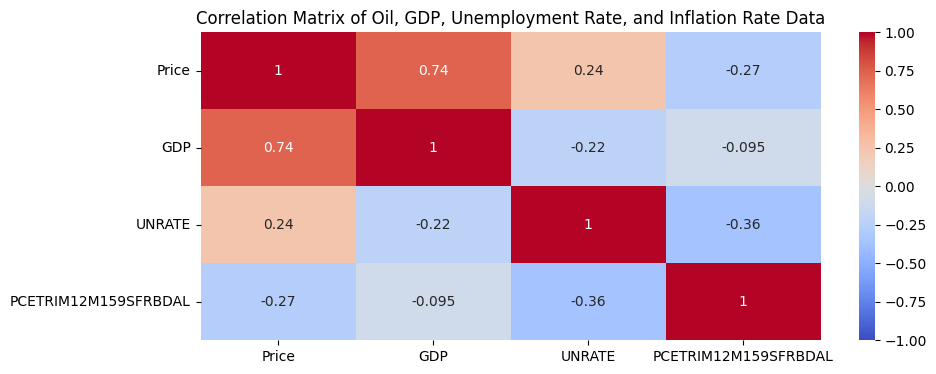

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming all DataFrames are aligned by their index and have the same index 'Data'
# First, concatenate the DataFrames along the columns
combined_data = pd.concat([oil_data, gdp_data, unrate_data, infrate_data], axis=1)

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Oil, GDP, Unemployment Rate, and Inflation Rate Data")
plt.show()


In [ ]:
print('\nUnique dates in our data: ', len(data.index.unique()), 'Days')
our_date_range = data.index.max() - data.index.min()

# Calculate number of days in date range
print('Total days in our date range:', our_date_range.days, 'Days')
#date_range = pd.date_range(min(data.index), max(data.index))


Unique dates in our data:  9011 Days
Total days in our date range: 12962 Days


In [ ]:
new_index = pd.date_range(data.index.min(), data.index.max())
print(new_index)

DatetimeIndex(['1987-05-20', '1987-05-21', '1987-05-22', '1987-05-23',
               '1987-05-24', '1987-05-25', '1987-05-26', '1987-05-27',
               '1987-05-28', '1987-05-29',
               ...
               '2022-11-05', '2022-11-06', '2022-11-07', '2022-11-08',
               '2022-11-09', '2022-11-10', '2022-11-11', '2022-11-12',
               '2022-11-13', '2022-11-14'],
              dtype='datetime64[ns]', length=12963, freq='D')


In [ ]:
data_new = data.reindex(new_index, fill_value=0)
data_new

,Price
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-23,0.00
1987-05-24,0.00
...,...
2022-11-10,94.25
2022-11-11,96.37
2022-11-12,0.00
2022-11-13,0.00


In [ ]:
# prompt: use interpolation for data with 0

# Interpolate the missing values (0s) using linear interpolation
data_new['Price'] = data_new['Price'].interpolate(method='linear')
data_new

,Price
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-23,0.00
1987-05-24,0.00
...,...
2022-11-10,94.25
2022-11-11,96.37
2022-11-12,0.00
2022-11-13,0.00


In [ ]:
# Create the events DataFrame
events = pd.DataFrame({
    'Event Date': ['1990-08-02', '2001-09-11', '2008-09-15', '2020-03-09'],
    'Event Name': ['Iraq Invades Kuwait', '9/11 Attacks', 'Lehman Brothers Collapse', 'Oil Price War'],
    'Description': [
        'Iraq’s invasion of Kuwait leads to Gulf War, impacting oil supply.',
        'Terrorist attacks in the U.S. trigger economic instability.',
        'Global financial crisis begins, causing a severe demand drop.',
        'Price war between Russia and Saudi Arabia amid COVID-19 pandemic.'
    ]
})

# Convert 'Event Date' to datetime format
events['Date'] = pd.to_datetime(events['Event Date'])

# Format 'Event Date' to show only the year and month (YYYY-MM)
events['Date'] = events['Date'].dt.strftime('%Y-%m-%d')

#events=events[['Date','Event Name']]
#events.set_index('Event Date', inplace=True)
# Display the first few rows of the events DataFrame
events.head()


,Event Date,Event Name,Description,Date
0,1990-08-02,Iraq Invades Kuwait,"Iraq’s invasion of Kuwait leads to Gulf War, i...",1990-08-02
1,2001-09-11,9/11 Attacks,Terrorist attacks in the U.S. trigger economic...,2001-09-11
2,2008-09-15,Lehman Brothers Collapse,"Global financial crisis begins, causing a seve...",2008-09-15
3,2020-03-09,Oil Price War,Price war between Russia and Saudi Arabia amid...,2020-03-09


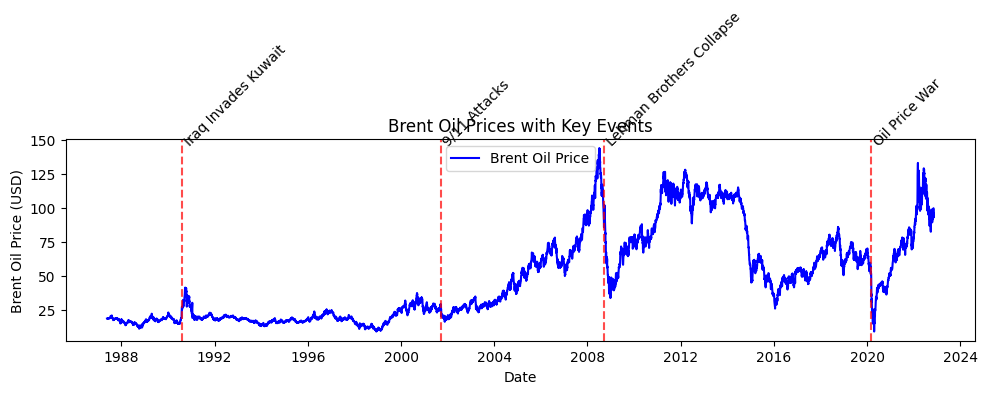

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure dates are in datetime format
data.index = pd.to_datetime(data.index)
events['Date'] = pd.to_datetime(events['Date'])

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(data, label='Brent Oil Price', color='blue')

# Annotate events on the plot
for i, row in events.iterrows():
    plt.axvline(row['Date'], color='red', linestyle='--', alpha=0.7)
    plt.text(row['Date'], data['Price'].max(), row['Event Name'], rotation=45, verticalalignment='bottom')

# Labels and legend
plt.xlabel('Date')
plt.ylabel('Brent Oil Price (USD)')
plt.title('Brent Oil Prices with Key Events')
plt.legend()
plt.tight_layout()
plt.show()


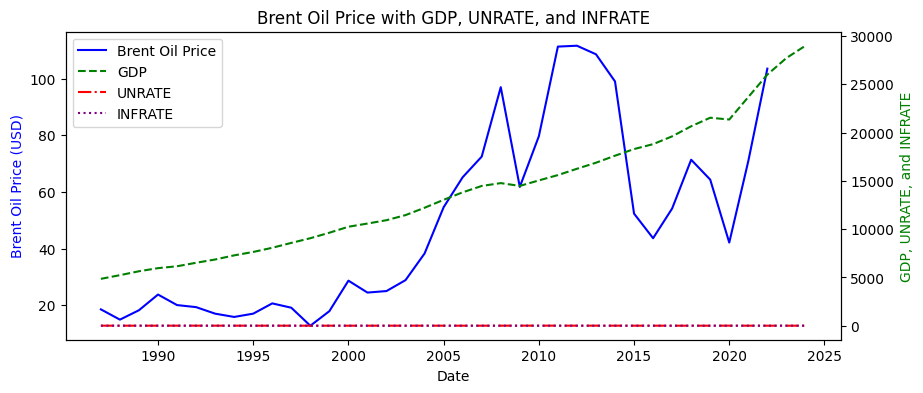

In [ ]:
import matplotlib.pyplot as plt

# Plotting without merging
plt.figure(figsize=(10, 4))

# Plot Brent Oil Price
plt.plot(oil_data, label='Brent Oil Price', color='blue')

# Plot GDP on the same plot with a secondary y-axis
ax1 = plt.gca()  # Get current axis for Brent Oil Price
ax2 = ax1.twinx()  # Create a twin y-axis for GDP, UNRATE, and INFRATE

# Plot GDP
ax2.plot(gdp_data, label='GDP', color='green', linestyle='--')

# Plot UNRATE
ax2.plot(unrate_data, label='UNRATE', color='red', linestyle='-.')

# Plot INFRATE
ax2.plot(infrate_data, label='INFRATE', color='purple', linestyle=':')

# Adding labels and legends
ax1.set_xlabel('Date')
ax1.set_ylabel('Brent Oil Price (USD)', color='blue')
ax2.set_ylabel('GDP, UNRATE, and INFRATE', color='green')

# Create separate legends for each axis
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Display the plot
plt.title('Brent Oil Price with GDP, UNRATE, and INFRATE')
plt.show()


Iteration:      1,   Func. Count:      6,   Neg. LLF: 996702.8115617717
Iteration:      2,   Func. Count:     13,   Neg. LLF: 89265.40072893858
Iteration:      3,   Func. Count:     19,   Neg. LLF: 126108.86915711519
Iteration:      4,   Func. Count:     25,   Neg. LLF: 55949.37812946427
Iteration:      5,   Func. Count:     30,   Neg. LLF: 13065160.56653098
Iteration:      6,   Func. Count:     36,   Neg. LLF: 104543.29473394722
Iteration:      7,   Func. Count:     46,   Neg. LLF: 70276.34346709301
Iteration:      8,   Func. Count:     52,   Neg. LLF: 89260.58202804482
Iteration:      9,   Func. Count:     58,   Neg. LLF: 55524.327112706545
Iteration:     10,   Func. Count:     64,   Neg. LLF: 267950.38799104706
Iteration:     11,   Func. Count:     70,   Neg. LLF: 89231.70426335515
Iteration:     12,   Func. Count:     76,   Neg. LLF: 87818.86105751505
Iteration:     13,   Func. Count:     82,   Neg. LLF: 55813.93817046708
Iteration:     14,   Func. Count:     88,   Neg. LLF: 55357.

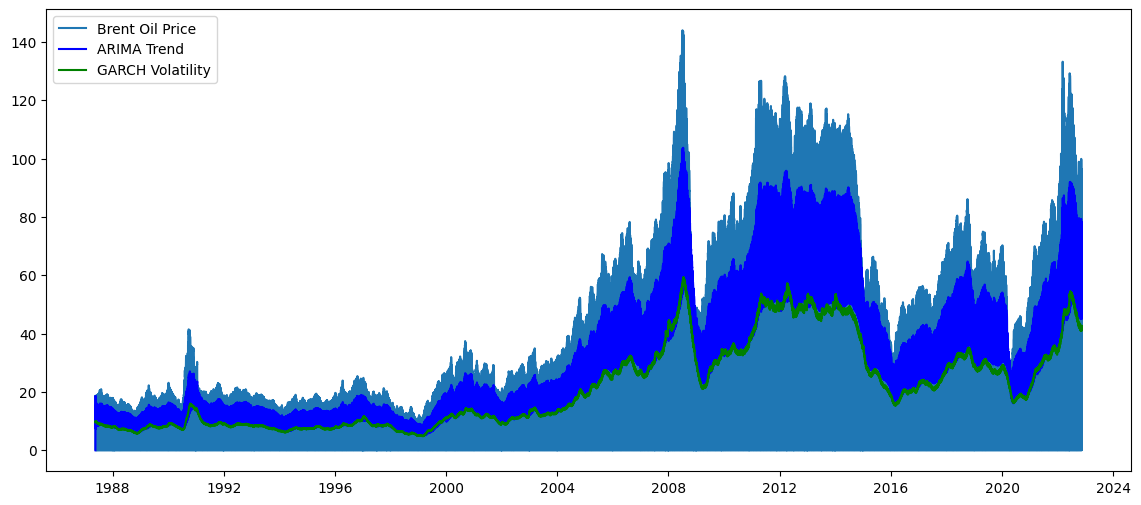

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

# Fit ARIMA for trend
arima_model = ARIMA(data['Price'], order=(1, 1, 1))
arima_result = arima_model.fit()

# Fit GARCH for volatility
garch_model = arch_model(arima_result.resid, vol='Garch', p=1, q=1)
garch_result = garch_model.fit()

# Plot ARIMA trend and GARCH volatility
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Price'], label='Brent Oil Price')
plt.plot(data.index, arima_result.fittedvalues, color='blue', label='ARIMA Trend')
plt.plot(data.index, garch_result.conditional_volatility, color='green', label='GARCH Volatility')
plt.legend()
plt.show()
